# Global settings

In [ ]:
%matplotlib inline

#%load_ext autoreload  # Autoreload has a bug : when you modify function in source code and run again, python kernel hangs :(
#%autoreload 2

import datetime as dt

import sys, importlib

from functions import *
importlib.reload(sys.modules['functions'])

import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import datetime as dt

import os
import zipfile
import urllib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np   
  
import plotly as py
import plotly.graph_objects as go
import ipywidgets as widgets

import qgrid

import glob

from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import GridSearchCV

from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import entropy

from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


import nltk
import codecs

#from nltk.corpus.reader.api import CorpusReader
#from nltk.corpus.reader.api import CategorizedCorpusReader

from nltk import pos_tag, sent_tokenize, wordpunct_tokenize

import pandas_profiling

from bs4 import BeautifulSoup

from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

DATA_PATH = os.path.join("datasets", "stackexchange")
#DATA_PATH = os.path.join(DATA_PATH, "out")

#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults_20190101-20200620.csv")
#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults 20200301-20200620_1.csv")

DATA_PATH_FILE = os.path.join(DATA_PATH, "*.csv")
ALL_FILES_LIST = glob.glob(DATA_PATH_FILE)

ALL_FEATURES = []

MODEL_CLIENT_FEATURES = ['TotalPricePerMonth', 'DescriptionNormalized', 'HasEverCancelled', 'BoughtTopValueProduct' ]


plt.rcParams["figure.figsize"] = [16,9] # Taille par défaut des figures de matplotlib

import seaborn as sns
from seaborn import boxplot
sns.set()

#import common_functions

####### Paramètres pour sauver et restaurer les modèles :
import pickle
####### Paramètres à changer par l'utilisateur selon son besoin :

'''
RECOMPUTE_GRIDSEARCH = True  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = False # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX
                          # Grid search results are loaded with full samples (SAMPLED_DATA must be False)
'''


RECOMPUTE_GRIDSEARCH = False  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = True # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX

#GRIDSEARCH_CSV_FILE = 'grid_search_results.csv'

GRIDSEARCH_FILE_PREFIX = 'grid_search_results_'

EXECUTE_INTERMEDIATE_MODELS = True # If True: every intermediate model (which results are manually analyzed in the notebook) will be executed


# Necessary for predictors used in the notebook :
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures

### For progress bar :
from tqdm import tqdm_notebook as tqdm

# Statsmodel : 
import statsmodels.formula.api as smf

import statsmodels.api as sm
from scipy import stats

SAVE_API_MODEL = True # If True : API model ill be saved
API_MODEL_PICKLE_FILE = 'API_model_PJ6.pickle'


In [ ]:
ALL_FILES_LIST

# Load data

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

feats_list = ['Title', 'Body', 'Tags']

def load_data(data_path=DATA_PATH):
    csv_path = DATA_PATH_FILE
    df_list = []
    
    for f in ALL_FILES_LIST:
        print(f'Loading file {f}')
        
        df_list.append(pd.read_csv(f, sep=',', header=0, encoding='utf-8', usecols=feats_list))
        
    return pd.concat(df_list)


In [ ]:
df = load_data()
df.reset_index(inplace=True)

In [ ]:
df

## Drop NA on body and remove html tags

In [ ]:
df.dropna(subset=['Body'], axis=0, inplace=True)

In [ ]:
# Manually with a regexp
#df.loc[:, 'Body'] = df['Body'].str.replace('<[^<]+?>', '') 

In [ ]:
# Or with beautifulsoup
df.loc[:, 'Body'] = df['Body'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [ ]:
df

In [ ]:
print(df['Body'].loc[0])

In [ ]:
print(df['Body'].loc[10000])

In [ ]:
print(df['Body'].loc[100000])

In [13]:
print(df[df['Body'].str.contains('html')]['Body'].iloc[2])

I'm receiving a data from AJAX response and I'm trying to update a jQuery plugin with that value in the success callback:
$.ajax({
   url: '/some/url',
   type: 'GET',
   dataType: 'json',
   success: (data) => {
      $(".my-rating").starRating('setRating', data.rating);
   }
});

I'm using the star-rating-svg plugin to show ratigns (http://nashio.github.io/star-rating-svg/demo/). The problem is that I'm having an error:

Uncaught TypeError: $(...).starRating is not a function

However, this function works perfectly when is called outside AJAX callback. Do you know how to deal with this?
EDIT:
Larger piece of my code:
show.ejs
<!DOCTYPE html>
<html>
    <head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css">
    <script src="https://code.jquery.com/jquery-3.3.1.min.js"></script>
    <script type="text/javascript" src="/star-svg/src/jquery.star-rating-svg.js"></script>
    <link rel="stylesheet" type="text/css" href="/star-svg

In [14]:
# Converting tags from <tag 1><tag2><tag3> to tag1 tag2 tag3
df.loc[:, 'Tags'] = df['Tags'].str.replace('<', '') 
df.loc[:, 'Tags'] = df.loc[:, 'Tags'].str.replace('>', ' ') 
df.loc[:, 'Tags'] = df.loc[:, 'Tags'].str.rstrip()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299798 entries, 0 to 299999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   299798 non-null  int64 
 1   Body    299798 non-null  object
 2   Title   299144 non-null  object
 3   Tags    299144 non-null  object
dtypes: int64(1), object(3)
memory usage: 21.4+ MB


In [16]:
df.sample(100)

,index,Body,Title,Tags
168799,18799,This is a problem on my homework:\nWrite a fun...,How to generate a biased coin with 1/3 probabi...,python
32480,32480,"I am new to Firebase Test Lab, and I'm having ...",Firebase Test Lab - iOS app not being installed,ios firebase xcuitest firebase-test-lab
296261,46261,I have a jekyll site that I want to deploy as ...,Jekyll custom theme not working on Github pages,jekyll github-pages
256947,6947,I'm looking for a more concise way of passing ...,Concise way of passing an instance method to #...,ruby
120023,20023,For a kind of CAD application I first create a...,QOpenGLWidget in QTabWidget slows MouseMoveEvent,qt opengl qopenglwidget
273428,23428,Someone named AJT complained that this is a du...,How to set a Javascript DOM setAttribute insid...,javascript angularjs
265073,15073,I am trying to download the outlook email atta...,How to download outlook email attachments usin...,python
277833,27833,From my main I am starting two threads called ...,Java how to avoid using Thread.sleep() in a loop,java producer-consumer
217770,17770,Unable to render different colors for specific...,"How to render substrings of a LaTeX string, in...",python matplotlib
223984,23984,I made an Angular Project with a menu and adde...,AngularJS: Unhandled Promise rejection: No Err...,javascript angular typescript kendo-ui kendo-grid


In [17]:
df

,index,Body,Title,Tags
0,0,The ::first-line and ::first-letter pseudo-ele...,Is there any way to inspect ::first-line and :...,css developer-tools
1,1,I have a property injected like so:\nVue.proto...,How to track changes to the injected root inst...,vue.js
2,2,so I'm trying to get this cloud query function...,Parse Cloud Code - Await and return relation q...,javascript parse-server parse-cloud
3,3,I need help with making some IF/OR/AND stateme...,complex IF statements with multiple variables ...,excel if-statement excel-formula
4,4,What is wrong with this filter? \n(&(objectCla...,Active Directory userAccountcontrol multiple v...,filter active-directory
...,...,...,...,...
299995,49995,I need to input filed value in application and...,Xpath to match case sensitive of multiple strings,selenium xpath xpath-1.0
299996,49996,I'm trying to do a basic test using Selenium G...,Using Selenium Grid to run Safari on MacOS Mojave,java selenium selenium-webdriver selenium-grid...
299997,49997,"Briefly, I'm parsing HTTP headers, received fr...","c, trimming strings, and wide characters",c trim widechar widestring
299998,49998,Context: I'm a student who just finished an op...,Operating systems vs. database management systems,database operating-system


# Global counts

In [18]:
df

,index,Body,Title,Tags
0,0,The ::first-line and ::first-letter pseudo-ele...,Is there any way to inspect ::first-line and :...,css developer-tools
1,1,I have a property injected like so:\nVue.proto...,How to track changes to the injected root inst...,vue.js
2,2,so I'm trying to get this cloud query function...,Parse Cloud Code - Await and return relation q...,javascript parse-server parse-cloud
3,3,I need help with making some IF/OR/AND stateme...,complex IF statements with multiple variables ...,excel if-statement excel-formula
4,4,What is wrong with this filter? \n(&(objectCla...,Active Directory userAccountcontrol multiple v...,filter active-directory
...,...,...,...,...
299995,49995,I need to input filed value in application and...,Xpath to match case sensitive of multiple strings,selenium xpath xpath-1.0
299996,49996,I'm trying to do a basic test using Selenium G...,Using Selenium Grid to run Safari on MacOS Mojave,java selenium selenium-webdriver selenium-grid...
299997,49997,"Briefly, I'm parsing HTTP headers, received fr...","c, trimming strings, and wide characters",c trim widechar widestring
299998,49998,Context: I'm a student who just finished an op...,Operating systems vs. database management systems,database operating-system


In [19]:
#pandas_profiling.ProfileReport(df)

## Tokens and vocabulary count

In [20]:
counts_body  = nltk.FreqDist()
tokens_body  = nltk.FreqDist()

for post in df.loc[:, 'Body']:
    for word in wordpunct_tokenize(post):
        counts_body['words'] += 1
        tokens_body[word] += 1
        
print('Counts for body text')
print('Number of tokens : ' + str(counts_body['words']))
print('Number of distinct tokens (vocabulary): ' + str(len(tokens_body)))

Counts for body text
Number of tokens : 94862048
Number of distinct tokens (vocabulary): 1632429


In [21]:
counts_tags  = nltk.FreqDist()
tokens_tags  = nltk.FreqDist()

for tag_line in df.dropna(subset=['Tags'], axis=0)['Tags']:
    for word in tag_line.split(' '):
        counts_tags['words'] += 1
        tokens_tags[word] += 1
        
print('Counts for tags')
print('Number of tokens : ' + str(counts_tags['words']))
print('Number of distinct tokens (vocabulary): ' + str(len(tokens_tags)))

Counts for tags
Number of tokens : 866719
Number of distinct tokens (vocabulary): 26431


In [22]:
#for token in tokens_tags:
#    print(token)

## Most represented tags

In [23]:
{k: v for k, v in sorted(tokens_tags.items(), key=lambda item: item[1], reverse=True)}

{'python': 34619,
 'javascript': 31805,
 'java': 22234,
 'c#': 17234,
 'android': 14944,
 'php': 14732,
 'html': 13084,
 'python-3.x': 9313,
 'reactjs': 8992,
 'css': 8824,
 'angular': 8745,
 'sql': 8281,
 'r': 8213,
 'node.js': 8011,
 'c++': 7708,
 'jquery': 7036,
 'mysql': 7003,
 'pandas': 5756,
 'ios': 5672,
 'swift': 5627,
 'arrays': 5034,
 'excel': 4776,
 'typescript': 4723,
 'sql-server': 4706,
 'django': 4540,
 'json': 4520,
 'laravel': 4423,
 'c': 4391,
 'vba': 3696,
 'react-native': 3457,
 'spring-boot': 3454,
 'firebase': 3317,
 'regex': 3006,
 'spring': 2979,
 'docker': 2946,
 'amazon-web-services': 2840,
 'vue.js': 2825,
 'wordpress': 2666,
 'flutter': 2631,
 'ruby-on-rails': 2569,
 '.net': 2509,
 'azure': 2484,
 'mongodb': 2454,
 'postgresql': 2379,
 'dataframe': 2378,
 'asp.net': 2186,
 'database': 2139,
 'bash': 2072,
 'tensorflow': 2051,
 'kotlin': 2041,
 'git': 2027,
 'ajax': 2008,
 'linux': 2005,
 'numpy': 1981,
 'oracle': 1932,
 'asp.net-core': 1874,
 'powershell': 1

# Cumulated number of posts against tags

In [24]:
tags_represented_posts_cumulated = np.cumsum([v for k, v in sorted(tokens_tags.items(), key=lambda item: item[1], reverse=True)])

In [25]:
tags_represented_posts_cumulated.max()

866719

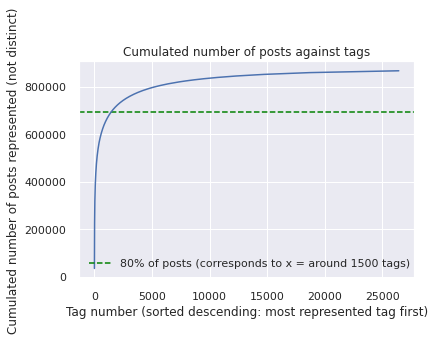

In [26]:
plt.title('Cumulated number of posts against tags')
plt.xlabel('Tag number (sorted descending: most represented tag first)')
plt.ylabel('Cumulated number of posts represented (not distinct)')
plt.axhline(tags_represented_posts_cumulated.max() * 0.80, color='green', linestyle='--', label=f"80% of posts (corresponds to x = around 1500 tags)")
plt.legend()
plt.plot(range(len(tags_represented_posts_cumulated)), tags_represented_posts_cumulated)

In [27]:
tags_represented_posts_cumulated[1500]

696337

# Frequency visualisation of tokens

In [28]:
#vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b") # this token pattern overrides default of min 2 letters for a word
#vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'") # Allows 1 word tokens like !, ?, ", '
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['Body'])

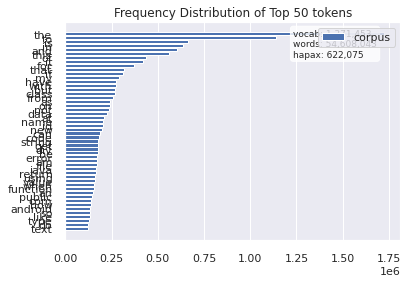

In [29]:
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()


In [30]:
#vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b") # this token pattern overrides default of min 2 letters for a word
#vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'") # Allows 1 word tokens like !, ?, ", '
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(df['Body'])

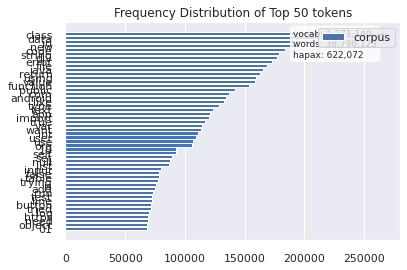

In [31]:
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

In [32]:
docs

<299798x1371140 sparse matrix of type '<class 'numpy.int64'>'
	with 18679310 stored elements in Compressed Sparse Row format>

In [33]:
np.min([len(f) for f in features])

2

## Most represented tokens

In [34]:
{k: v for k, v in sorted(tokens_body.items(), key=lambda item: item[1], reverse=True)}

{'.': 6049669,
 ',': 2289834,
 ':': 2175332,
 '(': 1916654,
 '-': 1623569,
 'the': 1587219,
 '"': 1352271,
 '=': 1342844,
 'I': 1292574,
 '/': 1179854,
 'to': 1124327,
 "'": 1047961,
 ')': 952216,
 'a': 786851,
 '{': 780943,
 '>': 711363,
 '0': 668393,
 '<': 666232,
 '}': 652153,
 ';': 626144,
 'is': 616724,
 'in': 589060,
 'and': 564106,
 '1': 563492,
 '="': 561011,
 'this': 490822,
 'of': 433796,
 'it': 377800,
 '[': 371780,
 '</': 344791,
 'for': 338372,
 ');': 337984,
 '",': 327242,
 'that': 310112,
 '2': 304640,
 'have': 273577,
 '$': 268744,
 '\\': 264726,
 '?': 264572,
 'with': 264085,
 'i': 260791,
 'if': 260121,
 'class': 259637,
 '()': 247264,
 'my': 242519,
 'from': 230554,
 'on': 224546,
 '("': 218331,
 'not': 218253,
 "',": 215084,
 'but': 214343,
 ']': 212486,
 'data': 207702,
 '":': 207253,
 'at': 204069,
 '3': 200687,
 'as': 195955,
 '|': 189633,
 '//': 186162,
 'new': 184914,
 '+': 182225,
 'div': 176156,
 'name': 173447,
 'be': 173061,
 't': 170164,
 'code': 169400,
 

# Annex

## Distinct tags covered against post numbers

cnt_docs = 0
cnt_nulltags = 0

cnt_distinct_tags_history = []
cnt_distinct_tags_current = 0

tokens_tags = nltk.FreqDist()

for tag_line in df['Tags']:
    '''
    if (cnt_docs < 10):
        print(tag_line)
        print(type(tag_line))
    '''
    
    if (str(tag_line) == 'nan'):
        cnt_nulltags +=1
    
    else:
        for word in tag_line.split():
            if (tokens_tags[word] == 0):
                cnt_distinct_tags_current += 1
                
            tokens_tags[word] += 1    
        
    cnt_distinct_tags_history.append(cnt_distinct_tags_current)
    
    cnt_docs += 1

plt.title('Cumulated number of distinct tags against post numbers')
plt.xlabel('Post ID')
plt.ylabel('Cumulated number of distinct tags represented')
plt.plot(range(cnt_docs), cnt_distinct_tags_history)